In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import kagglehub, os

In [2]:
path = kagglehub.dataset_download("marslinoedward/genre-classification-dataset")
print("✅ Path to dataset files:", path)

100%|██████████| 41.8M/41.8M [00:00<00:00, 164MB/s]

Extracting files...


✅ Path to dataset files: /root/.cache/kagglehub/datasets/marslinoedward/genre-classification-dataset/versions/1


In [3]:
print("📂 Files available:", os.listdir(path))

📂 Files available: ['test_data.csv', 'description.txt', 'train_data.csv', 'test_data_solution.csv']


In [4]:
#Load the training dataset
df = pd.read_csv(os.path.join(path, "train_data.csv"))

print("\n✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


✅ Dataset Loaded Successfully!
Shape: (54214, 4)
Columns: Index(['Unnamed: 0', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')
   Unnamed: 0                               TITLE       GENRE  \
0           1       Oscar et la dame rose (2009)       drama    
1           2                       Cupid (1997)    thriller    
2           3   Young, Wild and Wonderful (1980)       adult    
3           4              The Secret Sin (1915)       drama    
4           5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [5]:
#Basic cleaning
df = df.dropna(subset=['DESCRIPTION', 'GENRE'])
df.rename(columns={'DESCRIPTION': 'plot', 'GENRE': 'genre'}, inplace=True)

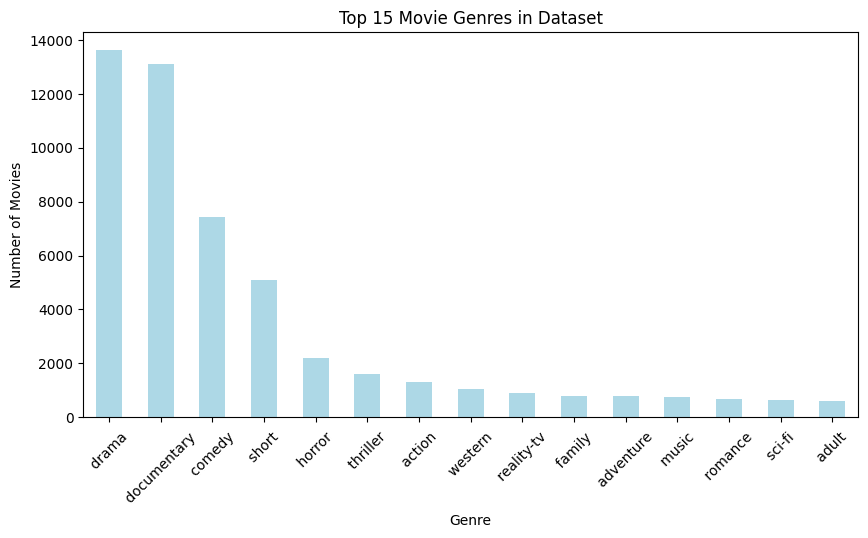

In [6]:
#Visualize genre distribution
plt.figure(figsize=(10,5))
df['genre'].value_counts().head(15).plot(kind='bar', color='lightblue')
plt.title("Top 15 Movie Genres in Dataset")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()

# Step 6: Split data
X = df['plot']
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
#TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [8]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

In [10]:
#Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"✅ Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



🔹 Training Logistic Regression...
✅ Accuracy: 0.5824
Classification Report:
                precision    recall  f1-score   support

      action        0.53      0.27      0.36       263
       adult        0.71      0.27      0.39       118
   adventure        0.61      0.11      0.19       155
   animation        0.56      0.05      0.09       100
   biography        0.00      0.00      0.00        53
      comedy        0.52      0.60      0.56      1490
       crime        0.20      0.01      0.02       101
 documentary        0.66      0.86      0.74      2619
       drama        0.54      0.78      0.64      2723
      family        0.55      0.08      0.13       157
     fantasy        0.00      0.00      0.00        65
   game-show        1.00      0.36      0.53        39
     history        0.00      0.00      0.00        49
      horror        0.69      0.58      0.63       441
       music        0.69      0.36      0.48       146
     musical        1.00      0.02      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Accuracy: 0.5148
Classification Report:
                precision    recall  f1-score   support

      action        0.55      0.02      0.04       263
       adult        0.38      0.03      0.05       118
   adventure        0.70      0.05      0.08       155
   animation        0.00      0.00      0.00       100
   biography        0.00      0.00      0.00        53
      comedy        0.51      0.42      0.46      1490
       crime        0.00      0.00      0.00       101
 documentary        0.56      0.90      0.69      2619
       drama        0.45      0.83      0.59      2723
      family        0.00      0.00      0.00       157
     fantasy        0.00      0.00      0.00        65
   game-show        1.00      0.05      0.10        39
     history        0.00      0.00      0.00        49
      horror        0.79      0.29      0.42       441
       music        0.75      0.02      0.04       146
     musical        0.00      0.00      0.00        55
     mystery        0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Accuracy: 0.5641
Classification Report:
                precision    recall  f1-score   support

      action        0.44      0.38      0.41       263
       adult        0.60      0.45      0.51       118
   adventure        0.37      0.20      0.26       155
   animation        0.23      0.13      0.17       100
   biography        0.00      0.00      0.00        53
      comedy        0.52      0.56      0.54      1490
       crime        0.16      0.05      0.08       101
 documentary        0.68      0.81      0.74      2619
       drama        0.56      0.68      0.62      2723
      family        0.30      0.15      0.20       157
     fantasy        0.10      0.03      0.05        65
   game-show        0.88      0.59      0.71        39
     history        0.29      0.04      0.07        49
      horror        0.61      0.62      0.61       441
       music        0.57      0.45      0.51       146
     musical        0.22      0.04      0.06        55
     mystery        0

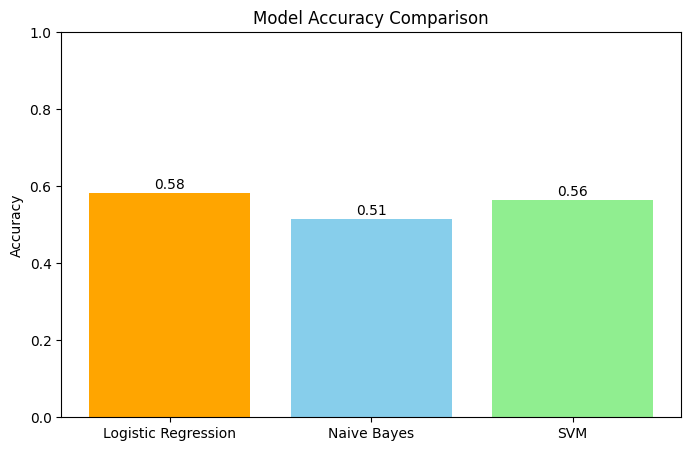

In [11]:
#Compare model performance
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['orange','skyblue','lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.show()

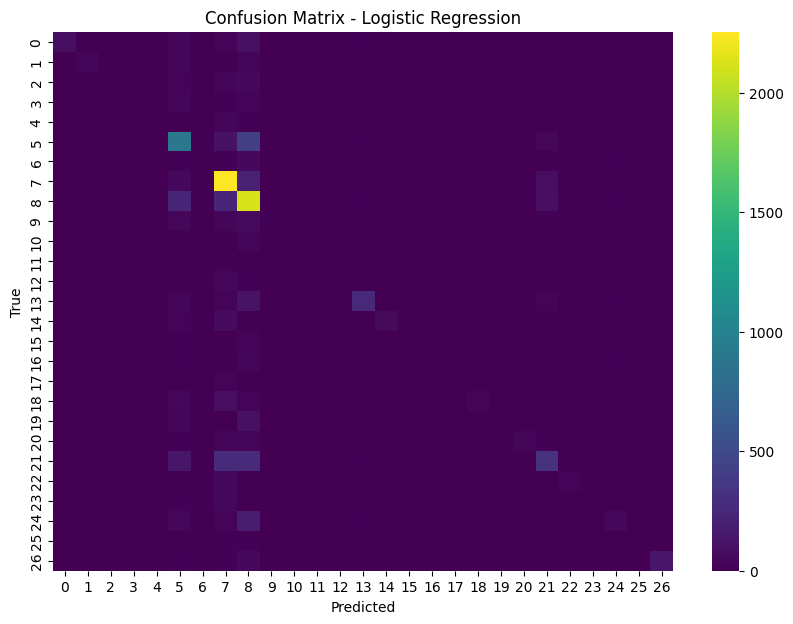


🏆 Best Model: Logistic Regression with Accuracy = 0.5824


In [12]:
# Confusion Matrix for Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_tfidf)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_best),
            annot=False, cmap='viridis')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(f"\n🏆 Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")

In [13]:
# Predict genre for a new plot
sample_plot = "A young man discovers a hidden world of magic and must fight against evil forces."
pred_genre = best_model.predict(tfidf.transform([sample_plot]))[0]
print(f"\n🎥 Predicted Genre for custom plot: {pred_genre}")


🎥 Predicted Genre for custom plot:  animation 
